## Distances and Angles between Images


The "distance" and "angle" between two image will be used to describe the simmilarity between two images. We will be using MNIST digits for the training sets and later we will be using the same concept to implement K Nearest Neighbours Algorithm, which classifies objects on the basis of distance.

In [1]:
# importing essential packages

import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
import scipy

import sklearn
from ipywidgets import interact
from load_data import load_mnist

from six.moves import urllib
from sklearn.datasets import fetch_mldata


# Loading MNIST dataset
MNIST = load_mnist()
images = MNIST['data'].astype(np.double)
labels = MNIST['target'].astype(np.int)

In [2]:
# plot figures so that they can shown in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
def distance(x0, x1):
    dist = np.dot(x0-x1, x0-x1)**0.5
    return dist

def angle(x0, x1):
    angle = np.arccos((np.dot(x0, x1))/((np.dot(x0,x0)*np.dot(x1,x1))**0.5))
    return angle

In [4]:
def plot_vector(a, b):
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.grid()
    ax.arrow(0, 0, a[0], a[1], head_width=0.05, head_length=0.1, 
            length_includes_head=True, linewidth=2, color='red')
    ax.arrow(0, 0, b[0], b[1], head_width=0.05, head_length=0.1, 
            length_includes_head=True, linewidth=2, color='red')

In [5]:
a = np.array([1, 0])
b = np.array([0, 1])
np.testing.assert_almost_equal(distance(a,b), np.sqrt(2))
assert((angle(a, b)/(np.pi*2)*360.)==90)

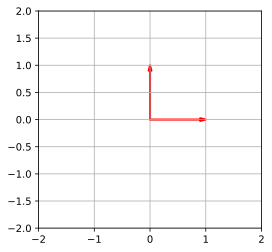

In [6]:
plot_vector(a, b)

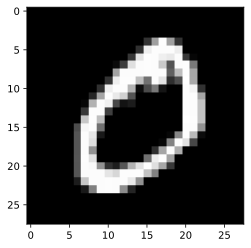

In [7]:
plt.imshow(images[labels==0].reshape(-1, 28, 28)[0], cmap='gray');

In [8]:
distances = []
min = 10000
index = 0
for i in range(len(images[:500])):
    for j in range(len(images[:500])):
        distances.append(distance(images[i], images[j]))
for j in range(1,500):
    if(min>distance(images[0], images[j])):
        min = distance(images[0], images[j])
        index = j
print(index)

61


In [9]:
@interact(first=(0, 499), second=(0, 499), continuous_update=False)
def show_img(first, second):
    plt.figure(figsize=(8,4))
    f = images[first].reshape(28, 28)
    s = images[second].reshape(28, 28)
    
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (1, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    
    #plt.imshow(np.hstack([f,s]), cmap='gray')
    ax0.imshow(f, cmap='gray')
    ax1.imshow(s, cmap='gray')
    ax2.hist(np.array(distances), bins=50)
    d = distance(f.ravel(), s.ravel())
    ax2.axvline(x=d, ymin=0, ymax=40000, color='C4', linewidth=4)
    ax2.text(0, 46000, "Distance is {:.2f}".format(d), size=12)
    ax2.set(xlabel='distance', ylabel='number of images')
    plt.show()

interactive(children=(IntSlider(value=249, description='first', max=499), IntSlider(value=249, description='se…

In [10]:
def most_similar_image():
    index = 61
    return index
result = most_similar_image()
result

61

In [11]:
means = {}
for n in np.unique(labels):
    means[n] = np.mean(images[labels==n], axis=0)

In [12]:
MD = np.zeros((10, 10))
AG = np.zeros((10, 10))
for i in means.keys():
    for j in means.keys():
        MD[i, j] = distance(means[i], means[j])
        AG[i, j] = angle(means[i].ravel(), means[j].ravel())

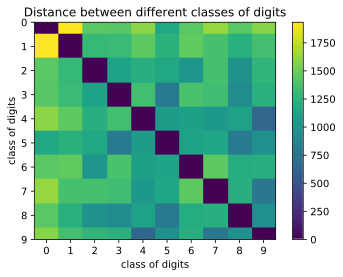

In [13]:
fig, ax = plt.subplots()
grid = ax.imshow(MD, interpolation='nearest')
ax.set(title='Distance between different classes of digits',
      xticks=range(10),
      xlabel='class of digits',
      yticks=range(10),
      ylabel='class of digits')
fig.colorbar(grid)
plt.show()

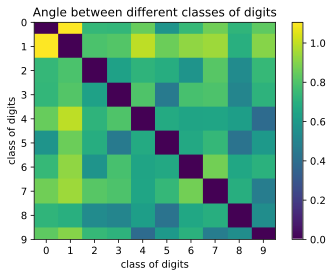

In [14]:
fig, ax = plt.subplots()
grid = ax.imshow(AG, interpolation='nearest')
ax.set(title='Angle between different classes of digits',
      xticks=range(10),
      xlabel='class of digits',
      yticks=range(10),
      ylabel='class of digits')
fig.colorbar(grid)
plt.show()

## K Nearest Neighbours

KNN classification algorithm determines the class to which a data belongs as per it's associated distance from varrious other categories.


In [15]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

iris = datasets.load_iris()
print('data shape is {}'.format(iris.data.shape))
print('class shape is {}'.format(iris.target.shape))

data shape is (150, 4)
class shape is (150,)


In [16]:
X = iris.data[:, :2] #using first two characteristics
y = iris.target

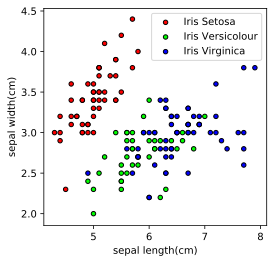

In [17]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

K = 3
x = X[-1]
fig, ax = plt.subplots(figsize=(4,4))
for i, iris_class in enumerate(['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']):
    idx = y==i
    ax.scatter(X[idx,0],X[idx,1],
              c=cmap_bold.colors[i], edgecolor='k',
              s=20, label=iris_class);
ax.set(xlabel='sepal length(cm)', ylabel='sepal width(cm)')
ax.legend();

In [18]:
def pairwise_distance_matrix(X, Y):
    N, D = X.shape
    M, _ = Y.shape
    distance_matrix = np.zeros((N, M)) # <-- EDIT THIS
    for i in range(N):
        for j in range(M):
            distance_matrix[i][j] = distance(matrix[i], matrix[j])
    return distance_matrix

In [19]:
def KNN(k, X, y, x):
    N, D = X.shape
    num_classes = len(np.unique(y))
    dist = np.zeros((N, 1))
    ypred = np.zeros(num_classes)
    classes = y[np.argsort(dist)][:k]
    for c in np.unique(classes):
        ypred[c] =  len(classes[classes == c])
        
    return np.argmax(ypred)

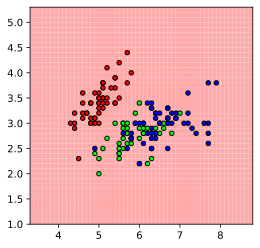

In [20]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

ypred = []
for data in np.array([xx.ravel(), yy.ravel()]).T:
    ypred.append(KNN(K, X, y, data.reshape(1,2)))

fig, ax = plt.subplots(figsize=(4,4))

ax.pcolormesh(xx, yy, np.array(ypred).reshape(xx.shape), cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20);